# Binary Tree

*What problem does binary tree solve?*

In Python, we can use *sets* in addition to lists. Sets remove duplicates.

* Every node has at most 2 child nodes
* On the left side, values are less than the parent node, while on the right side they are greater than the parent node.
* With each iteration in the search process, you reduce the search space by half

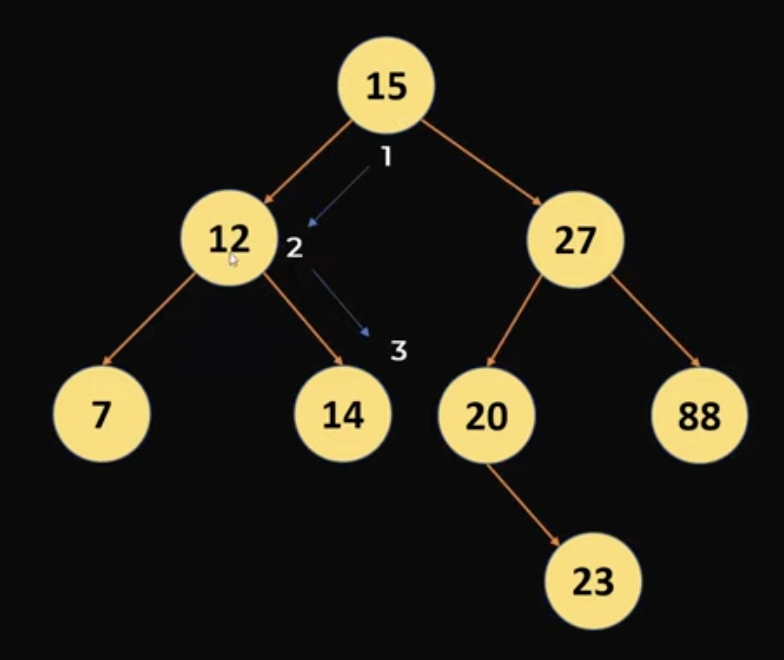

## Search complexity
Every iteration we reduce search space by half.

`n = 8`

8 -> 4 -> 2 -> 1 (3 iterations)

$\log_2{8} = 3$

Search Complexity = O(log n)

## Inserting an element

If we want to insert an element, the complexity will be O(log n) as well.

## Searching

In [75]:
class BinarySearchTreeNode:
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None
    
    def add_child(self,data):
        if data == self.data:
            return
        if data < self.data:
            # Add data to left subtree
            if self.left:
                self.left.add_child(data)
            else:
                self.left = BinarySearchTreeNode(data)
        else:
            # Add data to right subtree
            if self.right:
                self.right.add_child(data)
            else:
                self.right = BinarySearchTreeNode(data)
                
    def in_order_traversal(self):
        elements = []
        
        # visit left tree
        if self.left:
            elements += self.left.in_order_traversal()
        
        # Visit base node
        elements.append(self.data)
        
        if self.right:
            elements += self.right.in_order_traversal()
        
        return elements
    
            
    def search(self,val):
        if self.data == val:
            return True
        if val < self.data:
            # Val might be in left subtree
            if self.left:
                return self.left.search(val)
            else:
                return False
        else:
            #  Val might be in right subtree
            if self.right:
                return self.right.search(val)
            else:
                return False
            
    def pre_order_traversal(self):
        elements = []
        
        elements.append(self.data)
        
        if self.left:
            elements += self.left.in_order_traversal()
        
        if self.right:
            elements += self.right.in_order_traversal()
        
        return elements
    
    def post_order_traversal(self):
        elements = []
        if self.left:
            elements += self.left.in_order_traversal()
        if self.right:
            elements += self.right.in_order_traversal()
        elements.append(self.data)
        return elements
    
    def find_min(self):
        if self.left is None:
            return self.data
        return self.left.find_min()
    
    def find_max(self):
        if self.right is None:
            return self.data
        return self.right.find_max()
    
    def delete(self,val):
        if self.search(val) == False:
            raise Exception("Value not in tree")
        
        if val < self.data:
            if self.left:
                self.left = self.left.delete(val)
        elif val > self.data:
            if self.right:
                self.right = self.right.delete(val)
        else:
            if self.left is None and self.right is None:
                return None
            if self.left is None:
                return self.right
            if self.right is None:
                return self.left
            
            min_val = self.right.find_min()
            self.data = min_val
            self.right = self.right.delete(min_val)
        
        return self
            

In [76]:
def build_tree(elements):
    root = BinarySearchTreeNode(elements[0])
    
    for i in range(1, len(elements)):
        root.add_child(elements[i])
    
    return root

In [77]:
numbers = [17,4,1,20,9,23,18,34]
numbers_tree = build_tree(numbers)

In [78]:
print(numbers_tree.in_order_traversal())

[1, 4, 9, 17, 18, 20, 23, 34]


In [79]:
numbers_tree.search(20)

True

In [80]:
numbers_tree.pre_order_traversal()

[17, 1, 4, 9, 18, 20, 23, 34]

In [81]:
numbers_tree.post_order_traversal()

[1, 4, 9, 18, 20, 23, 34, 17]

## Node deletion

1. Delete node with no child
2. Delete node with 1 child
3. Delete node with 2 children
    - One way to deal with this is copying the minimum from the right subtree
    - This guarantees that the remaining nodes in the right subtree are greater than this value

In [82]:
numbers_tree.delete(20)
numbers_tree

In [85]:
numbers_tree.post_order_traversal()

[1, 4, 9, 18, 23, 34, 17]